In [47]:
import pandas
import seaborn as sns
from itertools import product
from typing import List

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")


def allocs(*args: List[List[str]]) -> List[str]:
    return ["".join(r) for r in product(*args)]


def read_orders(bench: str) -> pandas.DataFrame:
    data = []
    for o in range(11):
        d = pandas.read_csv(f"{dir}/{bench}{o}.csv")
        d["order"] = str(o)
        data.append(d)
    data = pandas.concat(data)
    data["cores"] = data["x"]
    data["get"] = data["get_avg"]
    data["put"] = data["put_avg"]
    return data

dir = "out-221213_1553"

# Bulk

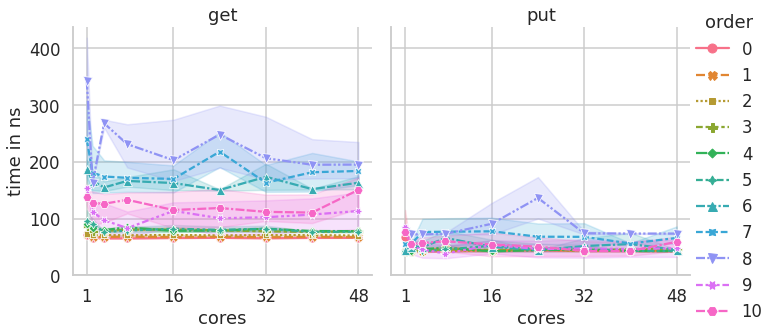

In [49]:
data = read_orders("bulk_v")
pgd = data[data["alloc"] == "Array3C32"]
pgd = pgd[["order", "cores", "alloc", "get", "put"]].melt(
    id_vars=["order", "cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
order = list(map(str, range(11)))
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="order", hue="order", markers=True)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


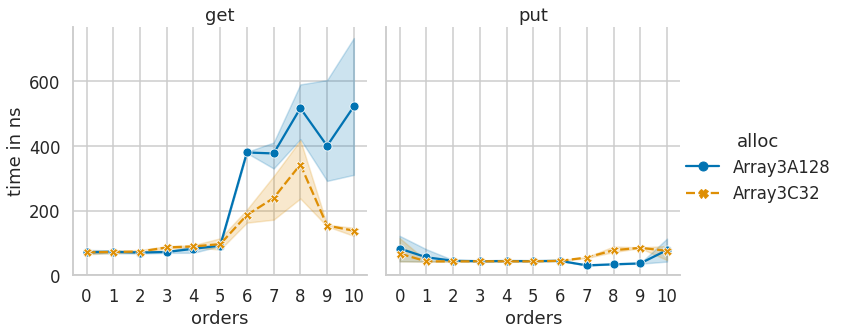

In [50]:
data = read_orders("bulk_v")
pgd = data[data["cores"] == 1]
pgd = pgd[["order", "alloc", "get", "put"]].melt(
    id_vars=["order", "alloc"],
    value_vars=["get", "put"], value_name="time")

order = allocs(["Array"], ["3"], ["A128", "C32"])
g = sns.relplot(data=pgd, kind="line", x="order", y="time",
                col="variable", markers=True, 
                hue="alloc", style="alloc", hue_order=order, style_order=order)
# g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="orders")
g.set_titles("{col_name}")


# Repeat

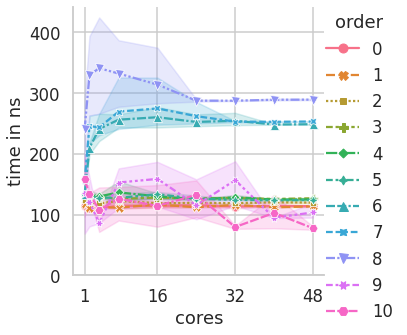

In [51]:
data = read_orders("repeat_v")
pgd = data[data["alloc"] == "Array3C32"]
order = list(map(str, range(11)))
g = sns.relplot(data=pgd, kind="line", x="cores", y="get",
                style="order", hue="order", markers=True)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


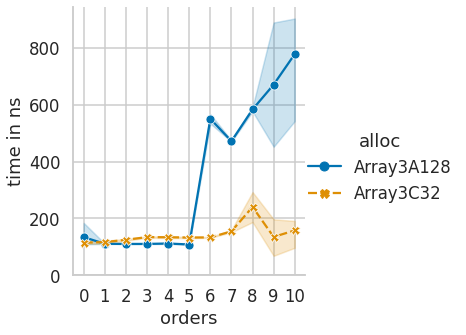

In [52]:
data = read_orders("repeat_v")
pgd = data[data["cores"] == 1]
order = allocs(["Array"], ["3"], ["A128", "C32"])
g = sns.relplot(data=pgd, kind="line", x="order", y="get",
                markers=True,
                hue="alloc", style="alloc", hue_order=order, style_order=order)
# g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="orders")
g.set_titles("{col_name}")


# Random

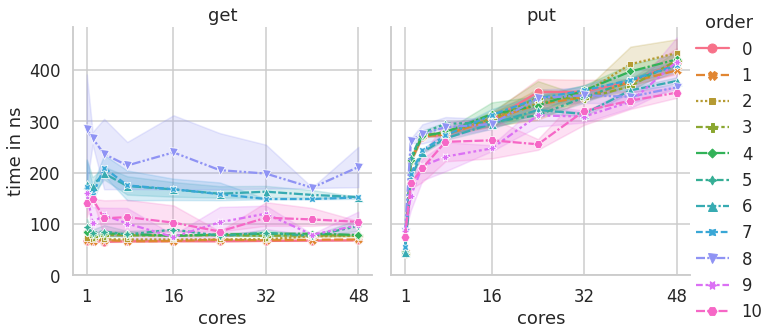

In [53]:
data = read_orders("rand_v")
pgd = data[data["alloc"] == "Array3C32"]
pgd = pgd[["order", "cores", "alloc", "get", "put"]].melt(
    id_vars=["order", "cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
order = list(map(str, range(11)))
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="order", hue="order", markers=True)
g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")


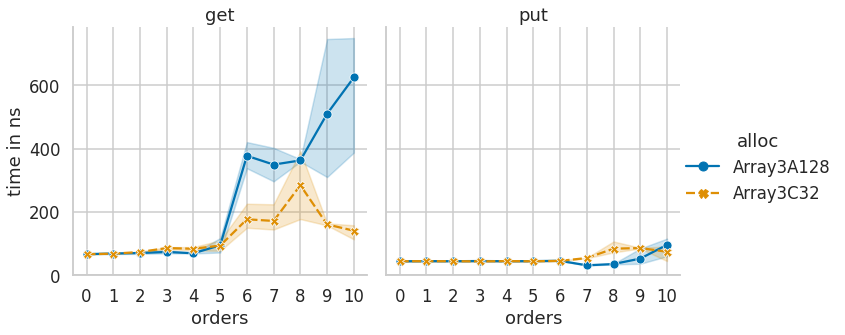

In [54]:
data = read_orders("rand_v")
pgd = data[data["cores"] == 1]
pgd = pgd[["order", "alloc", "get", "put"]].melt(
    id_vars=["order", "alloc"],
    value_vars=["get", "put"], value_name="time")

order = allocs(["Array"], ["3"], ["A128", "C32"])
g = sns.relplot(data=pgd, kind="line", x="order", y="time",
                col="variable", markers=True,
                hue="alloc", style="alloc", hue_order=order, style_order=order)
# g.set(xticks=[1, 16, 32, 48])
g.set(ylim=(0, None))
# g.legend.set_title("Order")
g.set(ylabel="time in ns")
g.set(xlabel="orders")
g.set_titles("{col_name}")
